<a href="https://colab.research.google.com/github/yaqianhe/GIA/blob/main/Lecture11_SpatialRaster_I%26II%26III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lecture 11: Spatial Raster data: Xarrary I&II&III
##Yaqian He
##Department of Geography
##University of Central Arkansas

Raster or "gridded" data are stored as a grid of values which are rendered on a map as pixels. Each pixel value represents an area on the Earth's surface. A raster file is composed of regular grid of cells, all of which are the same size. Specifically, in raster data:

- Each cell is called a pixel
- Each pixel represents an area on the ground
- The resolution of the raster represents the area that each pixel represents on the ground. For instance, a 1 meter resolution raster, means that each pixel represents a 1 m by 1 m area on the ground.

In this section, you will learn fundamental concepts related to working with raster data in Python, including understanding the spatial attributes of raster data, how to open raster data and access its metadata,and how to explore the distribution of values in a raster dataset.

The datasets used in this section including: (1) lidar derived raster data that represents both terrain/ elevation data, and surface elevation, (2) Landsat data

In [ ]:
# Import necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
# Use geopandas for vector data and xarray for raster data
!apt install libspatialindex-dev
!pip install rtree
!pip install geopandas
import geopandas as gpd
!pip install rioxarray
import rioxarray as rxr #rioxarray combines xarray and rasterio (typically for raster data)
import xarray as xr
!pip install earthpy
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import earthpy.mask as em
from shapely.geometry import mapping
from rasterio.crs import CRS
from rasterio.plot import plotting_extent
import rasterio as rio
from glob import glob

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (607 kB/s)
Selecting previously unselected package libspatialindex4v5:amd64.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../libspatialindex4v5_1.8.5-5_

In [ ]:
!pip install 'fsspec>=0.3.3'
!pip install dea_tools
from dea_tools.datahandling import paths_to_datetimeindex
from dea_tools.plotting import rgb

     |████████████████████████████████| 134 kB 7.0 MB/s 
     |████████████████████████████████| 120 kB 7.2 MB/s 
     |████████████████████████████████| 271 kB 16.8 MB/s 
     |████████████████████████████████| 216 kB 19.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 103 kB 22.5 MB/s 
     |████████████████████████████████| 3.3 MB 18.9 MB/s 
     |████████████████████████████████| 51 kB 8.5 MB/s 
     |████████████████████████████████| 82 kB 1.0 MB/s 
     |████████████████████████████████| 85 kB 5.5 MB/s 
  Created wheel for ciso8601: filename=ciso8601-2.2.0-cp37-cp37m-linux_x86_64.whl size=37539 sha256=1c21a86ac78c90e843b1ea54925497a6253ef6e1471bae204d7381625e1d51c1
  Stored in directory: /root/.cache/pip/wheels/ad/25/8f/3b0a82303191efe3c1204f3741c42d8eb2b0236567e22485de
  Created wheel for dask-image: filename=dask_image-2021.12.0-py2.py3-none-any.whl size=

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

Extracted output to /root/earth-analytics/data/colorado-flood/.


## 1. Open, View, and Preprocessing Raster Data
You can open the data using rioxarray - **rxr.open_rasterio ("path-to-raster")**

<h3> 1.1 Open and View Raster Data</h3>
A GeoTIFF is a standar .tif or image file format that includes additional spatial (georeferencing) information embeded in the .tif file as tags. There embeded tags are called tif tags. These tags can include the following raster metadata:

(1) Spatial extent

(2) Coordinate reference system

(3) Resolution

(4) nodata value

(5) How many layers are in the .tif file. (more on that later)

In [ ]:
# Define relative path to file
dem_pre_path = os.path.join("colorado-flood",
                            "spatial",
                            "boulder-leehill-rd",
                            "pre-flood",
                            "lidar",
                            "pre_DTM.tif") #DTM is same as DEM

dtm_pre_arr = rxr.open_rasterio(dem_pre_path) #you can also open data using xr.open_rasterio
dtm_pre_arr

<xarray.DataArray (band: 1, y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    _FillValue:    -3.4028234663852886e+38
    scale_factor:  1.0
    add_offset:    0.0

In [ ]:
# Notice that the shape of this object has a 1 at the beginning
# This can cause issues with plotting
# Later you will learn how to eliminate it.
dtm_pre_arr.shape

(1, 2000, 4000)

When you open raster data using xarray or rioxarray you are creating an xarray.DataArray. The DataArray object stores the:
- raster data in a numpy array format
- spatial metadata including the CRS, spatial extent of the object
- and any metdata

Xarray and numpy provide an efficient way to work with and process raster data. Xarray also supports dask and parallel processsing which allows you to more efficiently process larger datasets using the processing power that you have on your computer.

When you add rioxarray to your package imports, you further get access to spatial data processing using xarray objects.

In [ ]:
# View the Coordinate Reference System (CRS) & spatial extent
print("The CRS for this data is:", dtm_pre_arr.rio.crs)
print("The spatial extent is:", dtm_pre_arr.rio.bounds())
print("The spatial resolution is:", dtm_pre_arr.rio.resolution())
print("The metadata for your data is:", dtm_pre_arr.attrs)
print("Number of bands", dtm_pre_arr.rio.count)

The CRS for this data is: EPSG:32613
The spatial extent is: (472000.0, 4434000.0, 476000.0, 4436000.0)
The spatial resolution is: (1.0, -1.0)
The metadata for your data is: {'_FillValue': -3.4028234663852886e+38, 'scale_factor': 1.0, 'add_offset': 0.0}
Number of bands 1


The notdata value (or fill value) is also stored in the xarray object.

In [ ]:
# View no data value
print("The no data value is:", dtm_pre_arr.rio.nodata)

The no data value is: -3.4028235e+38


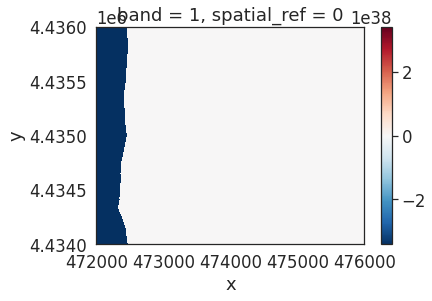

In [ ]:
# Plot rater data
dtm_pre_arr.plot()
plt.show()

The data above should represent terrain model data. However, the range of value is not what is expected. These data are for Boulder, Colorado where the elevation may range from 1000-3000m. There maybe some outlier values in the data that may need to be addressed.

This can be checked by using histogram.

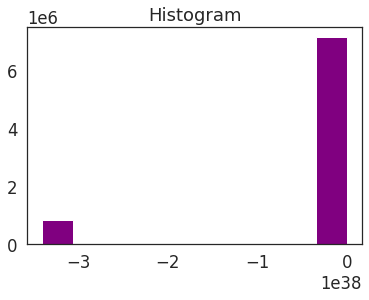

In [ ]:
# A histogram can also be helpful to look at the range of values in your data
# What do you notice about the histogram below?
dtm_pre_arr.plot.hist(color="purple")
plt.show()

Notice the number of values that are below 0. This suggests that there may be no data values in the data.

Looking at the min and max values of the data, you can see a very samll megative number of the minimun. This number matches the nodata value that you looked at above.

In [ ]:
print("the minimum raster value is: ", np.nanmin(dtm_pre_arr.values)) #Return minimum of an array or minimum along an axis, ignoring any NaNs.
print("the maximum raster value is: ", np.nanmax(dtm_pre_arr.values))

the minimum raster value is:  -3.4028235e+38
the maximum raster value is:  2087.43


<h3> 1.2 Preprocessing Raster Data</h3>

The no data values can be addressed by using **masked=Ture**

In [ ]:
# Open the data and mask no data values
# Squeeze reduces the third dimension given there is only one "band" or layer to this data
dtm_pre_arr = rxr.open_rasterio(dem_pre_path, masked=True).squeeze()
# Notice there are now only 2 dimensions to your array
dtm_pre_arr.shape

(2000, 4000)

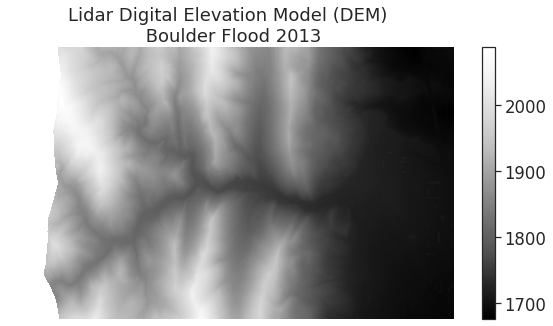

In [ ]:
# Plot the data and notice that the scale bar looks better
# Nodata values are now masked
f, ax = plt.subplots(figsize=(10, 5))
dtm_pre_arr.plot(cmap="Greys_r",
                 ax=ax)
ax.set_title("Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013")
ax.set_axis_off()
plt.show()

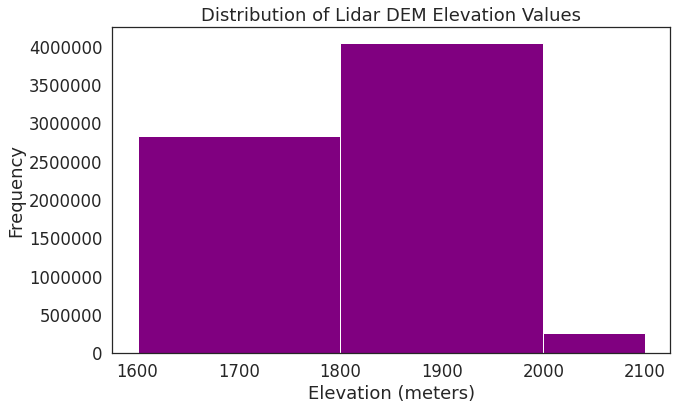

In [ ]:
# The histogram is also changed
f, ax = plt.subplots(figsize=(10, 6))
dtm_pre_arr.plot.hist(color="purple",
                      bins=[1600, 1800, 2000, 2100])
ax.set(title="Distribution of Lidar DEM Elevation Values",
       xlabel='Elevation (meters)',
       ylabel='Frequency')
for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)
plt.show()

In [ ]:
#The minimum value looks more like an elevation value, which should most oftern not be negative
print("The minimum raster value is: ", np.nanmin(dtm_pre_arr.data))
print("The maximum raster value is: ", np.nanmax(dtm_pre_arr.data))

The minimum raster value is:  1676.21
The maximum raster value is:  2087.43


<h3> 1.3 Plot Raster and Vector Data Together</h3>

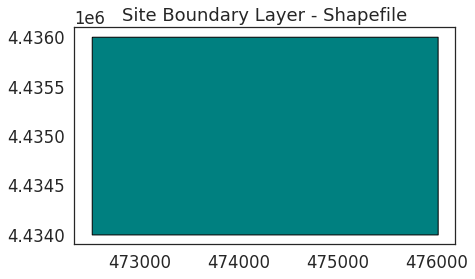

In [ ]:
# Open site boundary vector layer
site_bound_path = os.path.join("colorado-flood",
                               "spatial",
                               "boulder-leehill-rd",
                               "clip-extent.shp")
site_bound_shp = gpd.read_file(site_bound_path)

# Plot the vector data
f, ax = plt.subplots(figsize=(8,4))
site_bound_shp.plot(color='teal',
                    edgecolor='black',
                    ax=ax)
ax.set(title="Site Boundary Layer - Shapefile")
plt.show()

In [ ]:
# Check the CRS of the two dataset
print("The CRS for vector data is",site_bound_shp.crs)
print("The CRS for raster data is:", dtm_pre_arr.rio.crs)

The CRS for vector data is epsg:32613
The CRS for raster data is: EPSG:32613


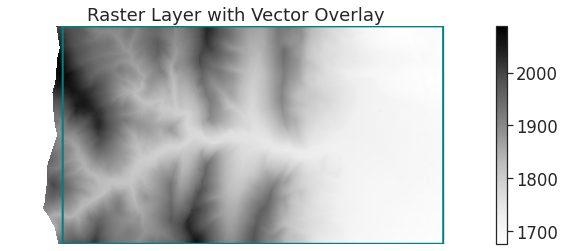

In [ ]:
f, ax = plt.subplots(figsize=(11, 4))

dtm_pre_arr.plot.imshow(cmap="Greys",
                        ax=ax)
site_bound_shp.plot(color='None',
                    edgecolor='teal',
                    linewidth=2,
                    ax=ax,
                    zorder=4)

ax.set(title="Raster Layer with Vector Overlay")
ax.axis('off')
plt.show()

## 2. Process Raster Data
<h3>2.1 Subtract Rasters</h3>

Often you need to process two or more raster datasets together to create a new raster output and then save that output as a new file.

In this section, you will learn how to subtract rasters and create a new GeoTIFF file in Python.



You have open DTM, in the following you will read DSM and generate canopy height.
 
 CHM=DSM-DTM

In [ ]:
# Read DSM
# Define relative path to file
lidar_dsm_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DSM.tif")

# Open lidar dem
lidar_dsm_xr = rxr.open_rasterio(lidar_dsm_path, masked=True).squeeze()
lidar_dsm_xr

<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

Before you substract the two rasters, you should check to ensure that they cover the same spatial extent and are of the same spatial resolution (pixel size).

In [ ]:
# Are the bounds the same?
print("Is the spatial extent the same?",
      dtm_pre_arr.rio.bounds() == lidar_dsm_xr.rio.bounds())

# Is the resolution the same ??
print("Is the resolution the same?",
      dtm_pre_arr.rio.resolution() == lidar_dsm_xr.rio.resolution())

Is the spatial extent the same? True
Is the resolution the same? True


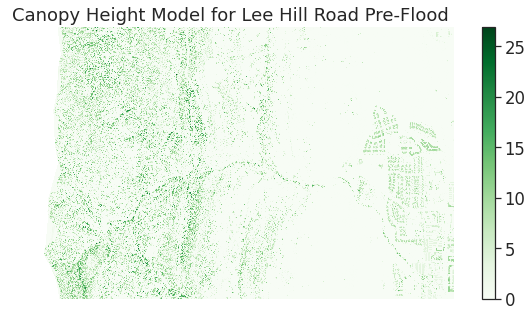

In [ ]:
# Calculate canopy height model
lidar_chm_xr = lidar_dsm_xr - dtm_pre_arr

# Plot the data
f, ax = plt.subplots(figsize=(10, 5))
lidar_chm_xr.plot(cmap="Greens")
ax.set(title="Canopy Height Model for Lee Hill Road Pre-Flood")
ax.set_axis_off()
plt.show()

Take a close look at the CHM plot. Do you think that the data just represents trees? Or do you see anything other types of objects represented in the data?

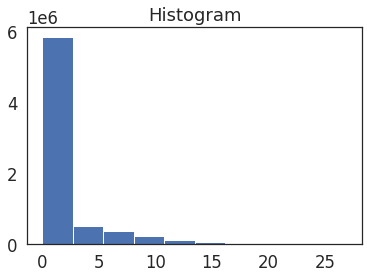

In [ ]:
lidar_chm_xr.plot.hist()
plt.show()

In [ ]:
print('CHM minimum value: ', np.nanmin(lidar_chm_xr))
print('CHM max value: ', np.nanmax(lidar_chm_xr))

CHM minimum value:  0.0
CHM max value:  26.930054


You can export a raster file in python using the rioxarray **write()** fuction. Export the canopy height model that you just created to your data folder. Here I create a folder named 'gia_YH'

In [ ]:
data_path = os.path.join("colorado-flood",
                         "spatial",
                         "gia_YH")

if os.path.exists(data_path):
    print("The directory", data_path, "exists!")
else:
    os.makedirs(data_path)

In [ ]:
# Make sure that your output data has a crs & no data value defined
print("The crs is", lidar_chm_xr.rio.crs)
print("The no data value is", lidar_chm_xr.rio.nodata)

The crs is EPSG:32613
The no data value is None


In [ ]:
pre_chm_data_path = os.path.join(data_path, "pre-flood-chm_YH.tif")
pre_chm_data_path

'colorado-flood/spatial/gia_YH/pre-flood-chm_YH.tif'

In [ ]:
# Export data to geotiff
lidar_chm_xr.rio.to_raster(pre_chm_data_path)

In [ ]:
# Reopen the data
lidar_chm_data = rxr.open_rasterio(pre_chm_data_path, masked=True).squeeze()
lidar_chm_data

<xarray.DataArray (y: 2000, x: 4000)>
[8000000 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

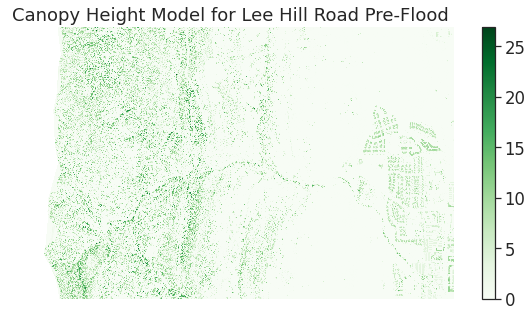

In [ ]:
# Plot the data
f, ax = plt.subplots(figsize=(10, 5))
lidar_chm_data.plot(cmap="Greens")
ax.set(title="Canopy Height Model for Lee Hill Road Pre-Flood")
ax.set_axis_off()
plt.show()

<h3>2.2 Classify Raster Data</h3>

In this section, you will learn how to reclassify a raster dataset in Python. When you reclassify a raster, you create a new raster object/ file that can be exported. 

In that raster, each pixel is mapped to a new value based on some approach.

There are many different approaches to do classification. Some use highly sophisticated spatial algorithms that identify patterns in the data that can in turn be used to classify particular pixels into particular "classes".

In this case, you are simply going to create the classes manually using the range of quantitative values found in the CHM data, which was created above.

Assuming that the data represent trees (though you know there are likely some building in the data), classify the raster into 3 classes:

- Short trees
- Medium trees
- Tall trees

In [ ]:
# View min and max values in the data
print('CHM min value:', np.nanmin(lidar_chm_data))
print('CHM max value:', np.nanmax(lidar_chm_data))

CHM min value: 0.0
CHM max value: 26.930054


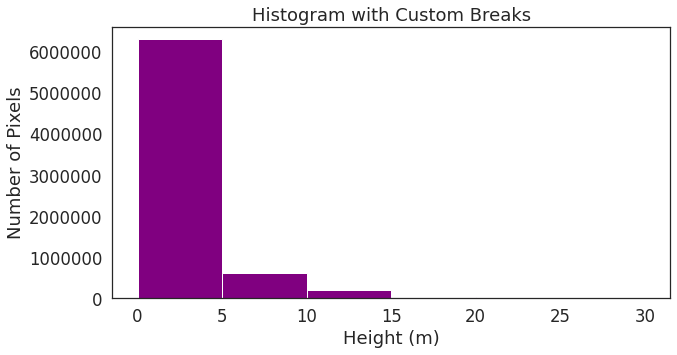

In [ ]:
# Histogram with custom breaks
f, ax = plt.subplots(figsize=(10, 5))
lidar_chm_data.plot.hist(color="purple",
                        bins=[0, 5, 10, 15, 20, 30])
ax.set(title="Histogram with Custom Breaks",
       xlabel="Height (m)",
       ylabel="Number of Pixels")
for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)
plt.show()

In the case of this lidar instrument, you know that values between 0 and 2 meters are not reliable (you know this if you read the documentation about the NEON sensor and how these data were processed). So you can define:
- 0-2 = no trees
- 2-7 = short trees
- 7-12 = medium trees
- $\gt$ 12 = tall trees

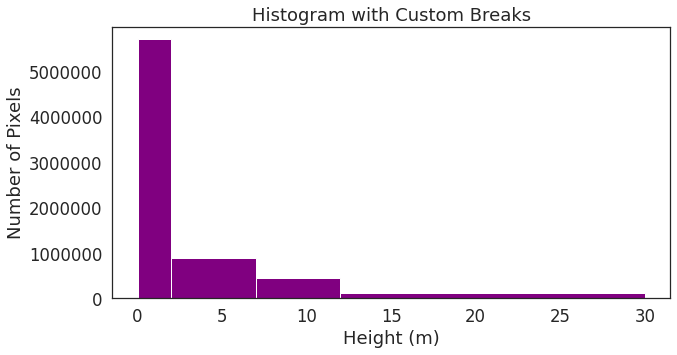

In [ ]:
# Histogram with custom breaks
f, ax = plt.subplots(figsize=(10, 5))

lidar_chm_data.plot.hist(
    color='purple',
    bins=[0, 2, 7, 12, 30])
ax.set(title="Histogram with Custom Breaks",
       xlabel="Height (m)",
       ylabel="Number of Pixels")
for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)
plt.show()

Now, you will reclassify your raster. You need to create a reclassification matrix. This matrix maps a range of values to a new defined value. You will use this matrix to create a classified canopy height model where you designate short, medium, and tall trees.
- no trees: (0-2m tall)=1
- short trees: (2-7m tall)=2
- medium trees: (7-12m tall)=3
- tall trees: ($\gt$ 12 tall)=4

You can use the Numpy function **digitize** to classy the values in an array.

In [ ]:
class_bins = [-np.inf, 2, 7, 12, np.inf]
class_bins

[-inf, 2, 7, 12, inf]

In [ ]:
# reclassify the raster through class_bins
pre_lidar_chm_class = xr.apply_ufunc(np.digitize,
                                     lidar_chm_data,
                                     class_bins)

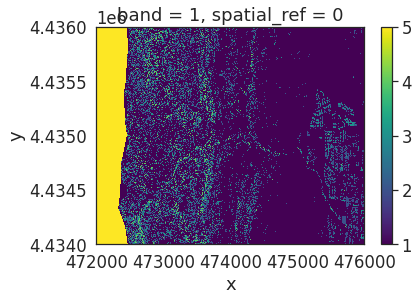

In [ ]:
# Values of 5 represent missing data
im = pre_lidar_chm_class.plot.imshow()
ax.set_axis_off()

Note that yellow on the left side of the plot. Those pixels do not contain data and have been automatically classified as value = 5. You can mask those pixels.

You can reassign the two classes in your data to a mask using **xarray.where()**.

In [ ]:
# Mask out values not equal to 5
pre_lidar_chm_class_ma = pre_lidar_chm_class.where(pre_lidar_chm_class != 5)
pre_lidar_chm_class_ma

<xarray.DataArray (y: 2000, x: 4000)>
array([[nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       ...,
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.]])
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

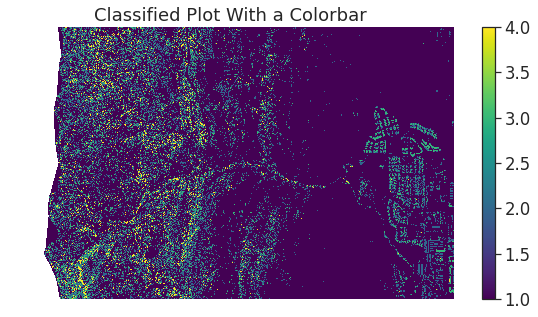

In [ ]:
# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10,5))
pre_lidar_chm_class_ma.plot.imshow()
ax.set(title="Classified Plot With a Colorbar")

ax.set_axis_off()
plt.show()

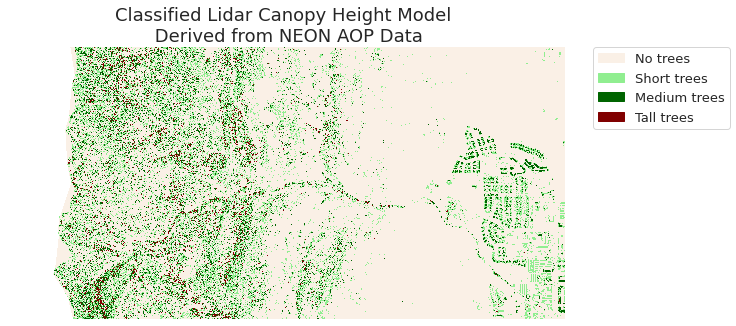

In [ ]:
# Add legend of tree's classes
# Create a list of labels to use for your legend
height_class_labels = ["No trees",
                       "Short trees",
                       "Medium trees",
                       "Tall trees"]

# Create a colormap from a list of colors
colors = ['linen',
          'lightgreen',
          'darkgreen',
          'maroon']

cmap = ListedColormap(colors)

class_bins = [1, 2, 3, 4,5]
norm = BoundaryNorm(class_bins,
                    len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))
im = pre_lidar_chm_class_ma.plot.imshow(cmap=cmap,
                                        norm=norm,
                                        # Turn off colorbar
                                        add_colorbar=False)
# Add legend using earthpy
ep.draw_legend(im,
               titles=height_class_labels)
ax.set(title="Classified Lidar Canopy Height Model \n Derived from NEON AOP Data")
ax.set_axis_off()
plt.show()

<h3>2.3 Crop Raster Data</h3>

You have learned how to crop vector data. In this section, you will learn how to crop a raster.

Cropping is when you subset or make a dataset smaller, by removing all data outside of the crop area or spatial extent. In this case, you have a large raster data but you only need a smaller subset of the raster.

You can use the **rio.clip** function to remove all of the data outside of your study area.

In [ ]:
# open study area, vector data
aoi = os.path.join("colorado-flood",
                   "spatial",
                   "boulder-leehill-rd",
                   "clip-extent.shp")

# Open crop extent (your study area extent boundary)
crop_extent = gpd.read_file(aoi)

# check the CRS of raster and vector data
print('crop extent crs: ', crop_extent.crs)
print('lidar crs: ', lidar_chm_data.rio.crs)

crop extent crs:  epsg:32613
lidar crs:  EPSG:32613


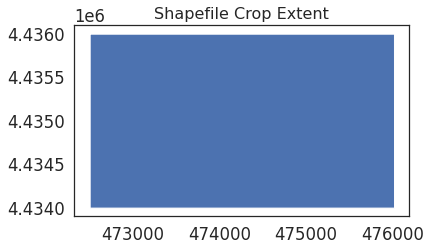

In [ ]:
# Plot the crop boundary layer to have a idea of how the aoi looks like.
fig, ax = plt.subplots(figsize=(6, 6))

crop_extent.plot(ax=ax)

ax.set_title("Shapefile Crop Extent",
             fontsize=16)
plt.show()

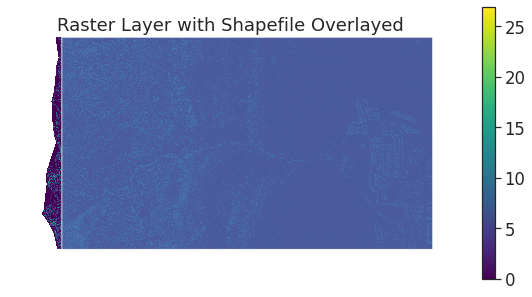

In [ ]:
# plot raster and vector together
f, ax = plt.subplots(figsize=(10, 5))
lidar_chm_data.plot.imshow(ax=ax)

crop_extent.plot(ax=ax,
                 alpha=.8)
ax.set(title="Raster Layer with Shapefile Overlayed")

ax.set_axis_off()
plt.show()

Now you will use **rio.clip** to crop the raster data.

In [ ]:
lidar_clipped = lidar_chm_data.rio.clip(crop_extent.geometry.apply(mapping),
                                      # This is needed if your aoi is in a diff CRS than the raster data
                                      crop_extent.crs)

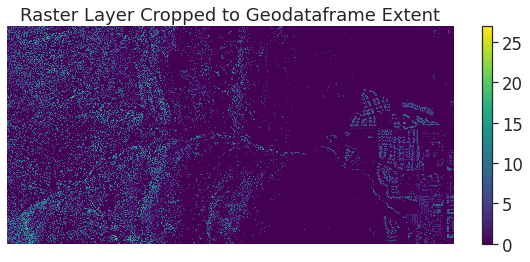

In [ ]:
# Plot the cropped data
f, ax = plt.subplots(figsize=(10, 4))
lidar_clipped.plot(ax=ax)
ax.set(title="Raster Layer Cropped to Geodataframe Extent")
ax.set_axis_off()
plt.show()

<h3>2.3 Reproject Raster Data</h3>

Sometimes your raster data are not all in the same CRS. When this happens, you may need to reproject your data from it's current CRS to match the CRS of other data that you are using.

In [ ]:
# Get a roda data from Boulder Open Data portal
boulder_roads = gpd.read_file(
    "https://opendata.arcgis.com/datasets/5388d74deeb8450e8b0a45a542488ec8_0.geojson")

boulder_roads.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Reproject the crop extent data to match the roads layer.
crop_extent_wgs84 = crop_extent.to_crs(boulder_roads.crs)

# Clip the buildings and roads to the extent of the study area using geopandas
roads_clip = gpd.clip(boulder_roads, crop_extent_wgs84)

In [ ]:
# check DTM CRS
dtm_pre_arr.rio.crs

CRS.from_epsg(32613)

The road data and DTM do not have the same CRS. If you plot them together, they can not aligned up.

You can use function of **reproject** to reproject the CRS.

In [ ]:
# Reproject the data using the crs from the roads layer
# Create a rasterio crs object for wgs 84 crs - lat / lon
crs_wgs84 = CRS.from_string('EPSG:4326')

# Reproject the data using the crs object
dtm_pre_arr_wgs84 = dtm_pre_arr.rio.reproject(crs_wgs84) # you can also use dtm_pre_arr.rio.reproject(boulder_roads.crs)/ ('EPSG:4326')
dtm_pre_arr_wgs84.rio.crs

CRS.from_epsg(4326)

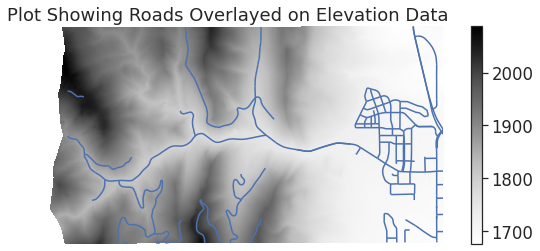

In [ ]:
# Plot road and raster data together
f, ax = plt.subplots(figsize=(10, 4))

dtm_pre_arr_wgs84.plot.imshow(ax=ax,
                            cmap='Greys')
roads_clip.plot(ax=ax)
ax.set(title="Plot Showing Roads Overlayed on Elevation Data")
ax.set_axis_off()
plt.show()

## 3. Landsat Data
At over 40 years, the Landsat series of satellite provides the longest temporal record of moderate resolution (~30 m) multispectral data of the Earth's surface on a global basis. 

Landsat is one of most popular satellite data that has been used widely to explore pressing evnrionmental problems. 

Landsat has different spectral bands, corresponding to different light (e.g., red, green, yellow, etc.). Check here https://www.usgs.gov/core-science-systems/nli/landsat/landsat-6?qt-science_support_page_related_con=4#qt-science_support_page_related_con for more information.

In this section, you will learn how to open and clean Landsat Data. You will use the latest Landsat 8 data.



In [ ]:
# Download data and set working directory
data = et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

Extracted output to /root/earth-analytics/data/cold-springs-fire/.


In [ ]:
# Get list of all pre-cropped data and sort the data

# Create the path to your data
landsat_post_fire_path = os.path.join("cold-springs-fire",
                                      "landsat_collect",
                                      "LC080340322016072301T1-SC20180214145802",
                                      "crop")

# Generate a list of just the tif files
post_fire_tifs_list = glob(os.path.join(landsat_post_fire_path,
                                        "*band*.tif"))

# Sort the data to ensure bands are in the correct order
post_fire_tifs_list.sort()
post_fire_tifs_list

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif']

In [ ]:
# Create an output array of all the landsat data stacked
landsat_post_fire_path = os.path.join("cold-springs-fire",
                                      "outputs",
                                      "landsat_post_fire.tif")

# This will create a new stacked raster with all bands
landsat_post_fire_arr, land_meta = es.stack(post_fire_tifs_list,
                                            landsat_post_fire_path)

# View output numpy array
landsat_post_fire_arr

array([[[ 446,  476,  487, ...,  162,  220,  260],
        [ 393,  457,  488, ...,  200,  235,  296],
        [ 364,  393,  388, ...,  246,  298,  347],
        ...,
        [ 249,  283,  363, ...,  272,  268,  284],
        [ 541,  474,  364, ...,  260,  269,  285],
        [ 219,  177,  250, ...,  271,  271,  286]],

       [[ 515,  547,  572, ...,  181,  233,  261],
        [ 440,  519,  571, ...,  211,  251,  322],
        [ 411,  460,  449, ...,  264,  326,  387],
        ...,
        [ 387,  326,  427, ...,  288,  278,  301],
        [ 554,  654,  433, ...,  276,  276,  293],
        [ 291,  174,  291, ...,  292,  290,  304]],

       [[ 782,  772,  843, ...,  335,  390,  411],
        [ 684,  771,  836, ...,  363,  412,  511],
        [ 656,  725,  706, ...,  425,  518,  599],
        ...,
        [ 685,  588,  718, ...,  422,  438,  470],
        [ 881,  909,  680, ...,  412,  431,  468],
        [ 464,  289,  427, ...,  408,  435,  484]],

       ...,

       [[2445, 2271, 241

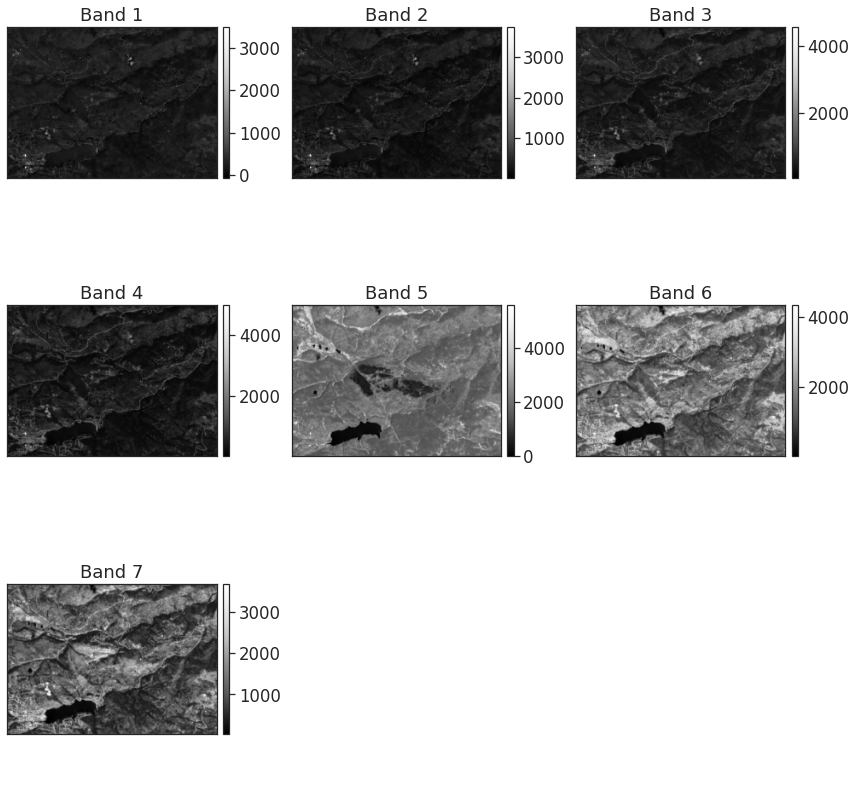

In [ ]:
# Plot all bands
ep.plot_bands(landsat_post_fire_arr)
plt.show()

You can also plot band color composite images for Landsat using **ep.plot_rgb()** function. Through the document of Landsat 8, you can know band 2 is blue, band 3 is green, and band 4 is red.

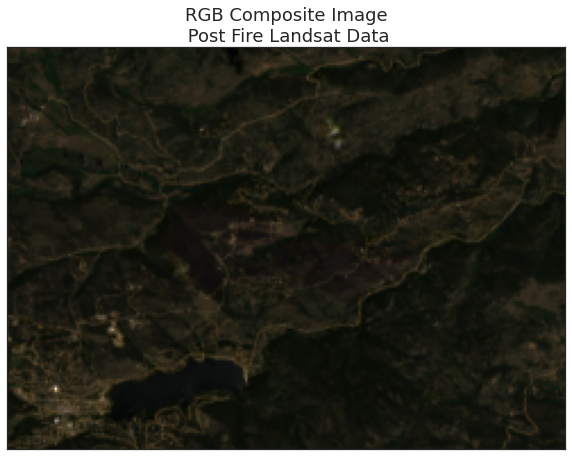

In [ ]:
ep.plot_rgb(landsat_post_fire_arr,
            rgb=[3, 2, 1], #note, the start index of Python is 0
            title="RGB Composite Image\n Post Fire Landsat Data")
plt.show()

When the range of pixel brightness values is closer to 0 (255), a darker (brighter) image is rendered by default. You can strtch the values to extend to the full 0-255 range of potential values to increase the visual contrast of the image.

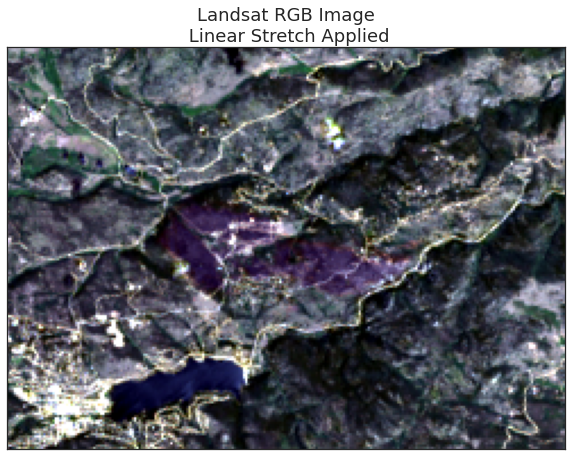

In [ ]:
ep.plot_rgb(landsat_post_fire_arr,
            rgb=[3, 2, 1],
            title="Landsat RGB Image\n Linear Stretch Applied",
            stretch=True,
            #allows you to specify how much of the tails of the data that you want to clip off. The larger the number, the more the data will be stretched or brightened.
            str_clip=1) # change the value if needed. 
plt.show()

RBG composite are called true color composite, as our eyes can see. You can also use other composite, such as fasle color composite using bands 5,4,3.

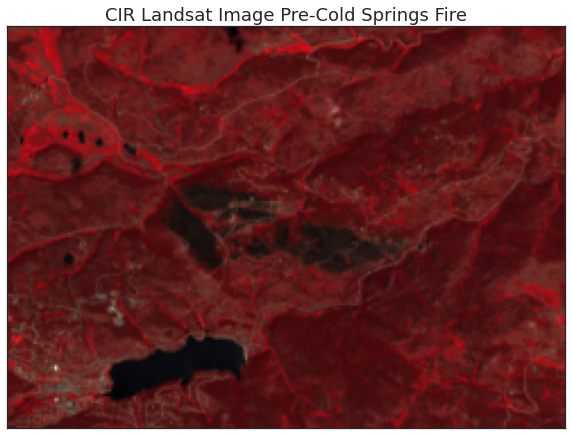

In [ ]:
ep.plot_rgb(landsat_post_fire_arr,
            rgb=[4, 3, 2],
            title="CIR Landsat Image Pre-Cold Springs Fire",
            figsize=(10, 10))
plt.show()

You can create  a histogram to view the distribution of pixel values in each band.

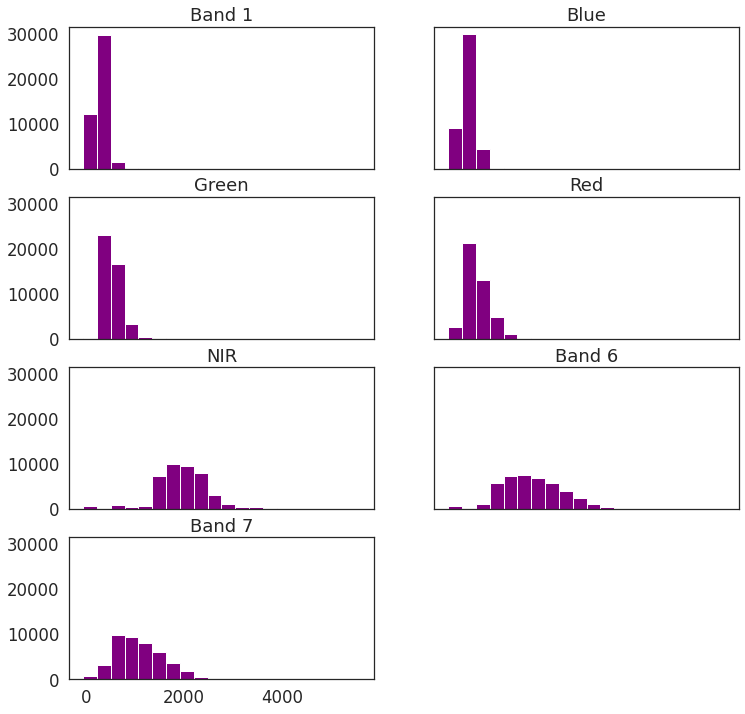

In [ ]:
# Plot all band histograms using earthpy
band_titles = ["Band 1", "Blue", "Green", "Red",
               "NIR", "Band 6", "Band 7"]

ep.hist(landsat_post_fire_arr,
        title=band_titles)

plt.show()

You have learned how to crop single raster data using **rio.clip**. Now you will learn how to crop Landsat bands using **crop_image**, **crop_all()**.

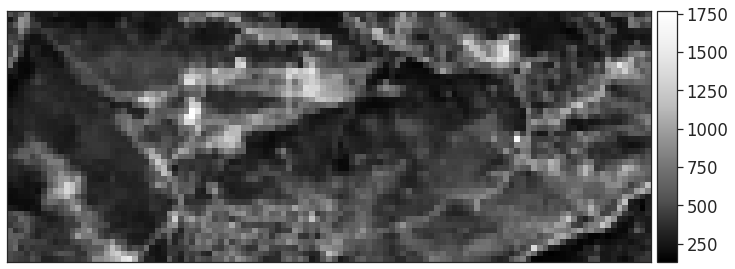

In [ ]:
# Open up boundary extent in GeoPandas

fire_boundary_path = os.path.join("cold-springs-fire",
                                  "vector_layers",
                                  "fire-boundary-geomac",
                                  "co_cold_springs_20160711_2200_dd83.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

# Open a single band and plot
with rio.open(post_fire_tifs_list[3]) as src:

    # Reproject the fire boundary shapefile to be the same CRS as the Landsat data
    crop_raster_profile = src.profile
    fire_boundary_utmz13 = fire_boundary.to_crs(crop_raster_profile["crs"])

    # Crop the landsat image to the extent of the fire boundary
    landsat_band4, landsat_metadata = es.crop_image(src, fire_boundary_utmz13)

ep.plot_bands(landsat_band4)
plt.show()

In [ ]:
cropped_dir = os.path.join("cold-springs-fire",
                           "outputs",
                           "landsat_post_crop")

# Make the directory if it doesn't already exist
if not os.path.isdir(cropped_dir):
    os.mkdir(cropped_dir)

# Crop your data
cropped_file_list = es.crop_all(raster_paths=post_fire_tifs_list,
                                output_dir=cropped_dir,
                                geoms=fire_boundary_utmz13,
                                overwrite=True,
                                verbose=True) #Returns a list of full file paths created by the function

# Note that because the original tif files ended with _crop you have an awkward
# Output name. crop_all by default adds _crop to the end of your newly cropped files
cropped_file_list

['cold-springs-fire/outputs/landsat_post_crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop_crop.tif',
 'cold-springs-fire/outputs/landsat_post_crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop_crop.tif',
 'cold-springs-fire/outputs/landsat_post_crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop_crop.tif',
 'cold-springs-fire/outputs/landsat_post_crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop_crop.tif',
 'cold-springs-fire/outputs/landsat_post_crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop_crop.tif',
 'cold-springs-fire/outputs/landsat_post_crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop_crop.tif',
 'cold-springs-fire/outputs/landsat_post_crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop_crop.tif']

In [ ]:
# This will create a new stacked raster with all bands
land_stack, land_meta = es.stack(band_paths=cropped_file_list)
land_stack

array([[[ 269,  218,  307, ...,  191,  223,  335],
        [ 148,  244,  504, ...,  348,  335,  383],
        [ 255,  291,  578, ...,  326,  319,  359],
        ...,
        [ 266,  275,  222, ...,  215,  162,  155],
        [ 275,  275,  283, ...,  238,  228,  226],
        [ 282,  264,  271, ...,  259,  286,  296]],

       [[ 327,  267,  384, ...,  216,  251,  341],
        [ 167,  295,  582, ...,  410,  384,  438],
        [ 291,  341,  654, ...,  365,  340,  382],
        ...,
        [ 320,  350,  261, ...,  242,  193,  218],
        [ 301,  312,  316, ...,  269,  270,  273],
        [ 312,  293,  288, ...,  289,  320,  342]],

       [[ 524,  433,  573, ...,  413,  409,  486],
        [ 326,  451,  827, ...,  649,  576,  646],
        [ 501,  577,  850, ...,  604,  508,  551],
        ...,
        [ 520,  576,  412, ...,  357,  321,  367],
        [ 451,  480,  484, ...,  387,  398,  423],
        [ 482,  429,  430, ...,  417,  451,  468]],

       ...,

       [[1910, 1684, 213

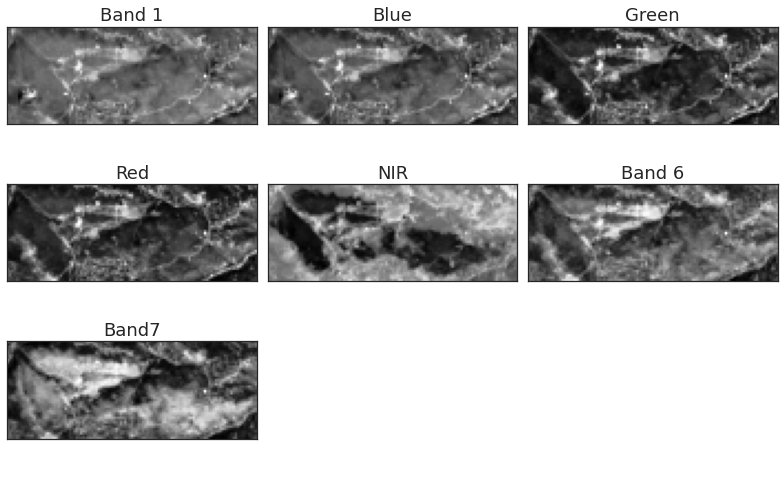

In [ ]:
# Plot all cropped bands
band_titles = ["Band 1", "Blue", "Green", "Red",
               "NIR", "Band 6", "Band7"]

ep.plot_bands(land_stack,
              figsize=(11, 7),
              title=band_titles,
              cbar=False)
plt.show()

Landsat images are easily contaminated by clouds and atmospheric conditions. Extreme cloud and shadows can make the data in those areas, un-usable given reflectance values are either washed out (too bright - as the clouds scatter all light back to the sensor) or are too dark (shadows which represent blocked or absorbed light).

You will learn how to deal with clouds in the following. 

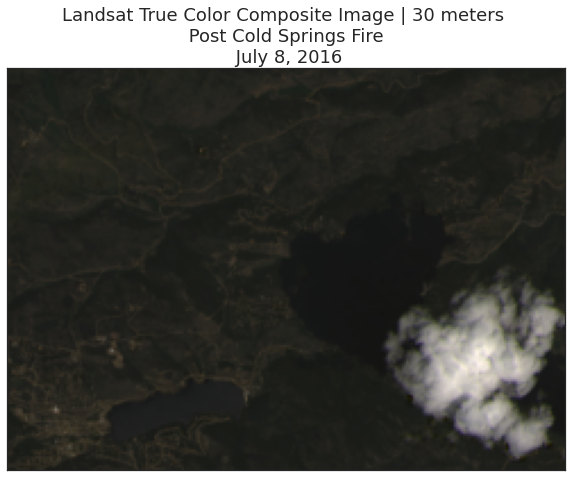

In [ ]:
landsat_paths_pre_path = os.path.join("cold-springs-fire", "landsat_collect", 
                                      "LC080340322016070701T1-SC20180214145604", "crop", 
                                      "*band*.tif")

landsat_paths_pre = glob(landsat_paths_pre_path)
landsat_paths_pre.sort()

# Stack the Landsat pre fire data
landsat_pre_st_path = os.path.join("cold-springs-fire", 
                                   "outputs", "landsat_pre_st.tif")

es.stack(landsat_paths_pre, landsat_pre_st_path)

# Read landsat pre fire data
with rio.open(landsat_pre_st_path) as landsat_pre_src:
    landsat_pre = landsat_pre_src.read(masked=True)
    landsat_extent = plotting_extent(landsat_pre_src)
    
ep.plot_rgb(landsat_pre,
            rgb=[3, 2, 1],
            extent=landsat_extent,
            title="Landsat True Color Composite Image | 30 meters \n Post Cold Springs Fire \n July 8, 2016")

plt.show()

Notice in the data above there is a large cloud in the scence. This cloud will impact any quantitative analysis that you perform on the data. You can remove cloudy pixels using a mask. Masking 'bad' pixels using pixel_qa layer, a quality layer in Landsat.

When you doanload Landsat 8 data from Earth Explorer, the data came with a processed cloud shadow/ mask raster layer called landsat_file_name_pixel_qa.tif.

In [ ]:
landsat_pre_cl_path = os.path.join("cold-springs-fire", "landsat_collect", 
                                   "LC080340322016070701T1-SC20180214145604", "crop", 
                                   "LC08_L1TP_034032_20160707_20170221_01_T1_pixel_qa_crop.tif")

# Open the pixel_qa layer for your landsat scene
with rio.open(landsat_pre_cl_path) as landsat_pre_cl:
    landsat_qa = landsat_pre_cl.read(1)
    landsat_ext = plotting_extent(landsat_pre_cl)
    
# You can grab the cloud pixel values from earthpy
high_cloud_confidence = em.pixel_flags["pixel_qa"]["L8"]["High Cloud Confidence"]
cloud = em.pixel_flags["pixel_qa"]["L8"]["Cloud"]
cloud_shadow = em.pixel_flags["pixel_qa"]["L8"]["Cloud Shadow"]

all_masked_values = cloud_shadow + cloud + high_cloud_confidence
all_masked_values

[328,
 392,
 840,
 904,
 1350,
 352,
 368,
 416,
 432,
 480,
 864,
 880,
 928,
 944,
 992,
 480,
 992]

To create a mask layer, you will:

(1) Make sure you use a raster layer for the mask that is the same extent and the same pixel resolution as your Landsat scence.

(2) Set all of the values in that layer that are clouds and or shadows to 1 (1 to represent mask = Ture)

(3) Finally you use the masked_array function to apply the mask layer to the Landsat scene that you are working with. All pixel location that were flagged as clouds or shadows in your mask to NA in your Landsat data.

In [ ]:
# Call the earthpy mask function using pixel QA layer
landsat_pre_cl_free = em.mask_pixels(
    landsat_pre, landsat_qa, vals=all_masked_values)

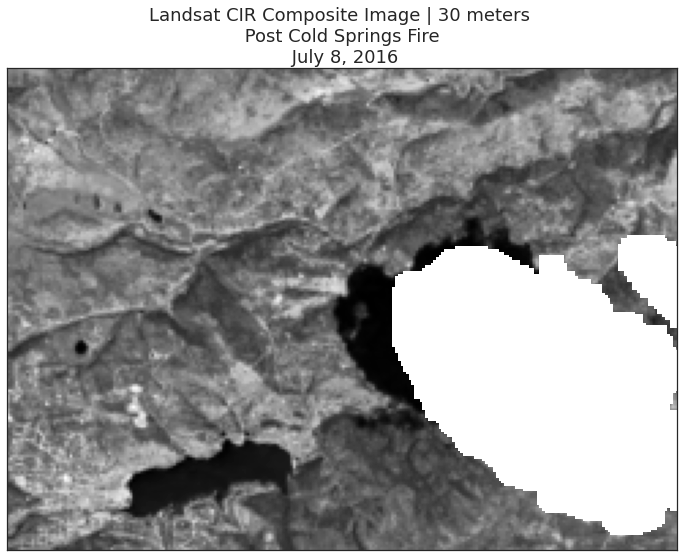

In [ ]:
# Plot the data
ep.plot_bands(landsat_pre_cl_free[5],
              extent=landsat_extent,
              #cmap="Greys",
              title="Landsat CIR Composite Image | 30 meters \n Post Cold Springs Fire \n July 8, 2016",
              cbar=False)
plt.show()

You can also use xarray to read and plot Landsata data

We now read these files using xarray. To ensure each raster is labelled correctly with its time, we can use the helper function **paths_to_datetimeindex()** from dea_datahandling to extract time information from the file paths we obtained above. We then load and concatenate each dataset along the time dimension using **xarray.open_rasterio()**, convert the resulting xarray.DataArray to a xarray.Dataset, and give the variable a more useful name.

In [ ]:
# Create variable used for time axis
time_var = xr.Variable('time', paths_to_datetimeindex(landsat_paths_pre,
                                                      string_slice=(26, -24)))

# Load in and concatenate all individual GeoTIFFs
geotiffs_da = xr.concat([xr.open_rasterio(i) for i in landsat_paths_pre],
                        dim=time_var)
# Print the output
print(geotiffs_da)

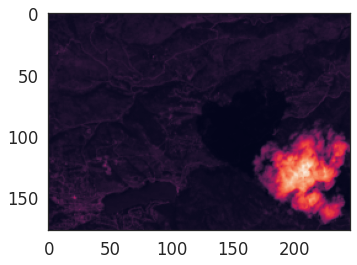

In [ ]:
# show plot
plt.imshow(geotiffs_da[3,:,:].squeeze())

## 4. NetCDF data

Those just getting started with NetCDF may find it a slightly confusing data format. NetCDF is based on the HDF5 file format, which allows for the segregation of metadata and different data types in the same file. This type of format is very powerful because it provides detailed documentation for the data and can store large volumes of data in an easily accessible way.

The NetCDF file format lends itself to climate data especially well. Datasets of climatic data, like precipitation and temperature, usually have repeat values at each recorded location at equally spaced time intervals. With NetCDF, the spatial structure of the data can be defined once, and then new data layers are added to the existing spatial definition.

You’ll learn more about this as we go through some examples.

The data is the monthly sea surface temperature data in the central pacific ocean in 2018 from https://oceanwatch.pifsc.noaa.gov/erddap/griddap/CRW_sst_v3_1_2020-clim.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# !!!Change the path for your data
file_path='/content/drive/My Drive/Colab Notebooks/GIA_2022Spring/CRW_sst_v1_0_monthly_66d4_a1fe_5440.nc'
ds = xr.open_dataset(file_path,decode_cf=False)
ds

Mounted at /content/drive/


<xarray.Dataset>
Dimensions:       (latitude: 261, longitude: 301, time: 12)
Coordinates:
  * time          (time) float64 1.515e+09 1.517e+09 ... 1.541e+09 1.544e+09
  * latitude      (latitude) float32 17.02 17.08 17.12 ... 29.92 29.98 30.02
  * longitude     (longitude) float32 195.0 195.1 195.1 ... 209.9 210.0 210.0
Data variables:
    analysed_sst  (time, latitude, longitude) float64 ...
Attributes: (12/64)
    acknowledgement:            NOAA Coral Reef Watch Program
    cdm_data_type:              Grid
    comment:                    This product is designed to improve on and re...
    contributor_name:           NOAA Coral Reef Watch program
    contributor_role:           Collecting source data and deriving products;...
    Conventions:                CF-1.6, ACDD-1.3, COARDS
    ...                         ...
    time_coverage_duration:     P1D
    time_coverage_end:          2018-12-01T12:00:00Z
    time_coverage_resolution:   P1D
    time_coverage_start:        2018-01-01T12:00:00Z
    title:                      ZZZ - DEPRECATED - Sea Surface Temperature, C...
    Westernmost_Easting:        195.025

In [ ]:
ds.coords

Coordinates:
  * time       (time) float64 1.515e+09 1.517e+09 ... 1.541e+09 1.544e+09
  * latitude   (latitude) float32 17.02 17.08 17.12 17.17 ... 29.92 29.98 30.02
  * longitude  (longitude) float32 195.0 195.1 195.1 195.2 ... 209.9 210.0 210.0

In [ ]:
ds.data_vars

Data variables:
    analysed_sst  (time, latitude, longitude) float64 ...

In [ ]:
ds.analysed_sst.shape

(12, 261, 301)

In [ ]:
ds.time

<xarray.DataArray 'time' (time: 12)>
array([1.514808e+09, 1.517486e+09, 1.519906e+09, 1.522584e+09, 1.525176e+09,
       1.527854e+09, 1.530446e+09, 1.533125e+09, 1.535803e+09, 1.538395e+09,
       1.541074e+09, 1.543666e+09])
Coordinates:
  * time     (time) float64 1.515e+09 1.517e+09 1.52e+09 ... 1.541e+09 1.544e+09
Attributes:
    _CoordinateAxisType:    Time
    actual_range:           [1.5148080e+09 1.5436656e+09]
    axis:                   T
    coverage_content_type:  coordinate
    ioos_category:          Time
    long_name:              reference time of the sst field
    standard_name:          time
    time_origin:            01-JAN-1970 00:00:00
    units:                  seconds since 1970-01-01T00:00:00Z

In [ ]:
import netCDF4 as nc
dates=nc.num2date(ds.time,ds.time.units,only_use_cftime_datetimes=False)
dates

array([datetime.datetime(2018, 1, 1, 12, 0),
       datetime.datetime(2018, 2, 1, 12, 0),
       datetime.datetime(2018, 3, 1, 12, 0),
       datetime.datetime(2018, 4, 1, 12, 0),
       datetime.datetime(2018, 5, 1, 12, 0),
       datetime.datetime(2018, 6, 1, 12, 0),
       datetime.datetime(2018, 7, 1, 12, 0),
       datetime.datetime(2018, 8, 1, 12, 0),
       datetime.datetime(2018, 9, 1, 12, 0),
       datetime.datetime(2018, 10, 1, 12, 0),
       datetime.datetime(2018, 11, 1, 12, 0),
       datetime.datetime(2018, 12, 1, 12, 0)], dtype=object)

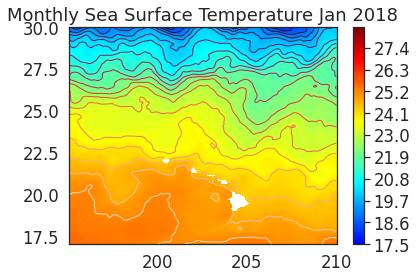

In [ ]:
#Creating a map for one time step
levs = np.arange(17.5, 28.5, 0.05)# determined by np.nanmin(ds.analysed_sst) np.nanmax(ds.analysed_sst)
jet=["blue", "#007FFF", "cyan","#7FFF7F", "yellow", "#FF7F00", "red", "#7F0000"]
cm = LinearSegmentedColormap.from_list('my_jet', jet, N=len(levs))
plt.contourf(ds.longitude, ds.latitude, ds.analysed_sst[0,:,:], levs,cmap=cm)
#plot the color scale
plt.colorbar()
#example of how to add a contour line
plt.contour(ds.longitude, ds.latitude, ds.analysed_sst[0,:,:],levels=20,linewidths=1)
#plot title
plt.title("Monthly Sea Surface Temperature " + dates[0].strftime('%b %Y'))
plt.show()

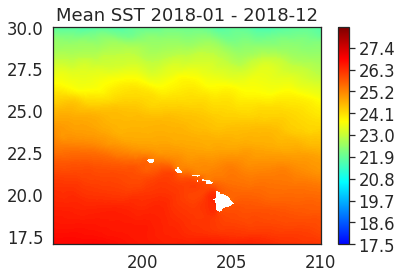

In [ ]:
#Creating a map of average SST over a year
mean_sst=np.mean(ds.analysed_sst,axis=0)
mean_sst.shape

plt.contourf(ds.longitude, ds.latitude, mean_sst, levs,cmap=cm)
plt.colorbar()
plt.title("Mean SST " + dates[0].strftime('%Y-%m')+' - '+dates[11].strftime('%Y-%m'))
plt.show()

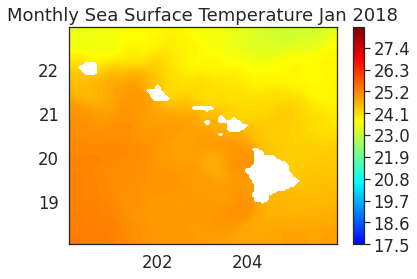

In [ ]:
#Plotting a time series
#Let's pick the following box : 18-23N, 200-206E. We are going to generate a time series of mean SST within that box.
lat_bnds, lon_bnds = [18, 23], [200, 206]
da=ds.sel(latitude=slice(*lat_bnds), longitude=slice(*lon_bnds))

plt.contourf(da.longitude, da.latitude, da.analysed_sst[0,:,:], levs,cmap=cm)
plt.colorbar()
plt.title("Monthly Sea Surface Temperature " + dates[0].strftime('%b %Y'))
plt.show()

Text(0, 0.5, 'SST (ºC)')

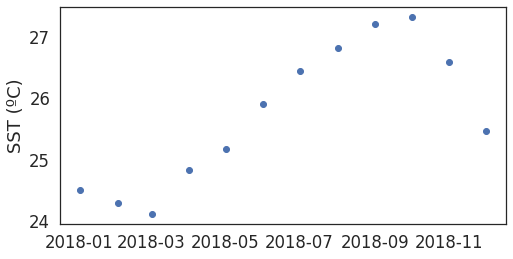

In [ ]:
res=np.mean(da.analysed_sst,axis=(1,2))

plt.figure(figsize=(8,4))
plt.scatter(dates,res)
plt.ylabel('SST (ºC)')

Reference: https://github.com/oceanwatch/python-satellite-course/blob/master/OW_Tutorial1.ipynb